# Principal component analysis

## Demonstration of step by step PCA using the Iris dataset

In [68]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [20]:
iris = load_iris(return_X_y=False, as_frame=False)

In [53]:
iris_df = pd.DataFrame(iris["data"][:10], columns=iris["feature_names"]).iloc[:,:3]

### Compute correlation matrix

In [248]:
standardized_iris = (iris_df - iris_df.mean())/iris_df.std(ddof=0)
correlation_matrix = 1/(iris_df.shape[0]) * standardized_iris.T.dot(standardized_iris)
correlation_matrix.columns = [col.split(" ")[1] for col in correlation_matrix.columns]
correlation_matrix.index = [col.split(" ")[1] for col in correlation_matrix.index]

### Compute sorted eigen vectors and values

In [327]:
eigenvalues = np.linalg.eigvals(correlation_matrix.values)
sorted_eigenvalues = np.sort(eigenvalues)[::-1]
sort_order_eigenvalues = np.argsort(eigenvalues)[::-1]
eigenvectors = np.linalg.eig(correlation_matrix.values)[1] # take the positive value
sorted_eigenvectors = eigenvectors[:,sort_order_eigenvalues]

### Project standardized matrix into this new space

In [338]:
projection = standardized_iris.dot(sorted_eigenvectors)

### Select the number of axis

In [341]:
np.cumsum(sorted_eigenvalues/sum(eigenvalues))

array([0.75933793, 0.93181068, 1.        ])

Text(0.5, 0, 'Eigenvalue index')

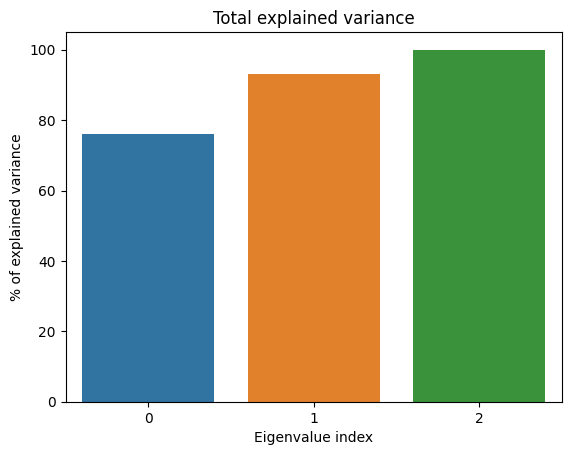

In [342]:
g = sns.barplot(x=np.arange(3), y=np.cumsum(sorted_eigenvalues/sum(eigenvalues))*100)
g.set_title("Total explained variance")
g.set_ylabel("% of explained variance")
g.set_xlabel("Eigenvalue index")

### Select final projection

In [343]:
final_projection = projection.iloc[:,:2]

### Check that variable are uncorelated

In [396]:
final_projection.corr()

,0,1
0,1.000000e+00,2.646010e-16
1,2.646010e-16,1.000000e+00


### Interprete results using correlation plot

In [399]:
correlations = []
for feature in range(standardized_iris.shape[1]):
    feature_correlation = []
    for component in range(final_projection.shape[1]):
        feature_correlation += [np.corrcoef(standardized_iris.iloc[:,feature], final_projection.iloc[:,component])[0,1]]
    correlations.append(feature_correlation)

Text(0, 0.5, 'Component 2')

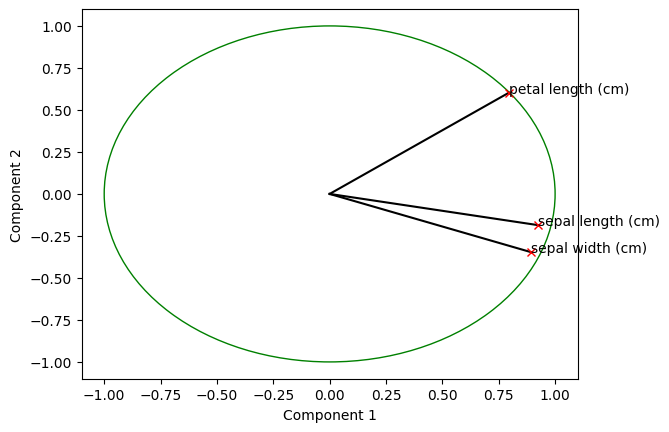

In [400]:
plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
fig = plt.gcf()
fig.gca().add_patch(circle1)

for ix, correlation in enumerate(correlations):
    x = correlation[0]
    y = correlation[1]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(standardized_iris.columns[ix], xy=(x,y))
plt.xlabel(f"Component 1")
plt.ylabel(f"Component 2")

## Using sklearn

In [234]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [386]:
pca = PCA(n_components=3)
pca_results = pca.fit(X=standardized_iris.values)

In [387]:
sklearn_projection = pca_results.transform(standardized_iris.values)

In [388]:
# There is a sign difference between what we observed earlier: https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative
# This is because we do not care about the sign for variance maximization

Text(0.5, 0, 'Eigenvalue index')

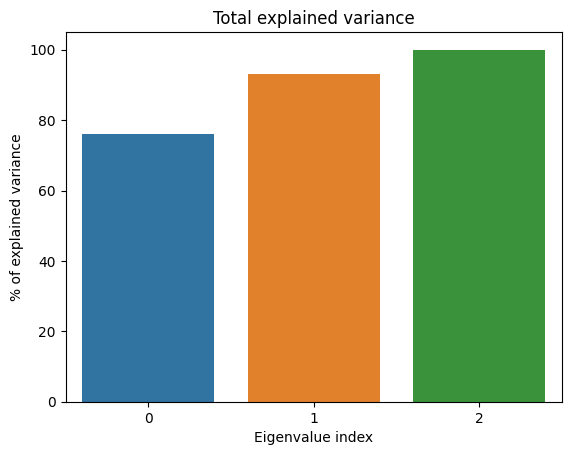

In [394]:
# Plot explained variance
g = sns.barplot(x=np.arange(3), y=np.cumsum(pca.explained_variance_ratio_)*100)
g.set_title("Total explained variance")
g.set_ylabel("% of explained variance")
g.set_xlabel("Eigenvalue index")

# t-SNE

In [408]:
from sklearn.manifold import TSNE

# Work on full dataset this time for nicer vizualization
iris_df = pd.DataFrame(iris["data"], columns=iris["feature_names"]).iloc[:,:3]

### Using TSNE

In [424]:
tsne = TSNE(n_components=2) # several hyperparameters, early exageration and the perplexity 
# see the documentation for a more detailed understanding

projection = tsne.fit_transform(iris_df.values)

Text(0, 0.5, 'sepal width (cm)')

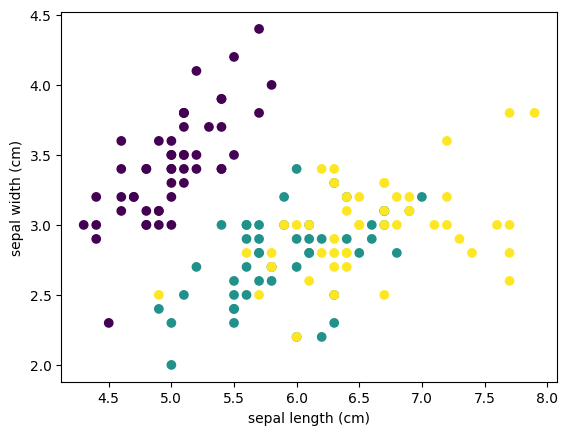

In [425]:
plt.scatter(x=iris_df.iloc[:,0], y=iris_df.iloc[:,1], c=iris["target"])
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])


Text(0, 0.5, 'petal length (cm)')

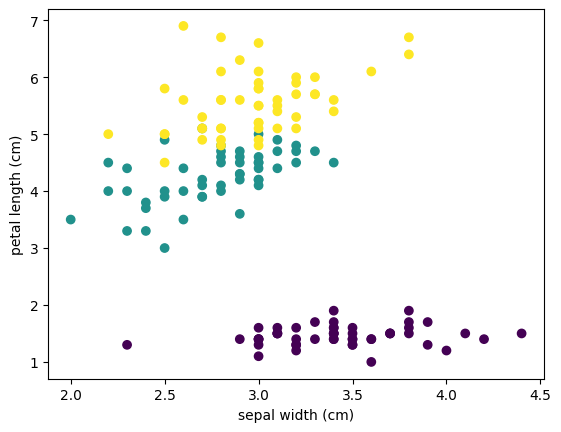

In [426]:
plt.scatter(x=iris_df.iloc[:,1], y=iris_df.iloc[:,2], c=iris["target"])
plt.xlabel(iris_df.columns[1])
plt.ylabel(iris_df.columns[2])


Text(0.5, 1.0, '2D projection using TSNE')

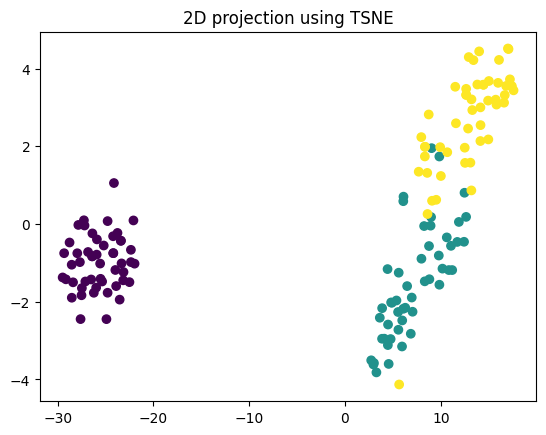

In [427]:
plt.scatter(x=projection[:,0], y=projection[:,1], c=iris["target"])
plt.title("2D projection using TSNE")

### Comparison with PCA

In [431]:
pca = PCA(n_components=2)
projection = pca.fit_transform(X=iris_df.values)

Text(0.5, 1.0, '2D projection using PCA')

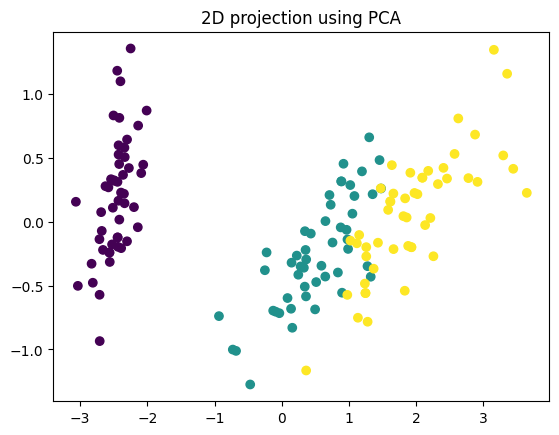

In [432]:
plt.scatter(x=projection[:,0], y=projection[:,1], c=iris["target"])
plt.title("2D projection using PCA")